## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 33s 650us/step - loss: 2.2644 - accuracy: 0.1556 - val_loss: 2.2164 - val_accuracy: 0.1962
Epoch 2/500
50000/50000 [==============================] - 20s 397us/step - loss: 2.1820 - accuracy: 0.2278 - val_loss: 2.1523 - val_accuracy: 0.2368
Epoch 3/500
50000/50000 [==============================] - 20s 392us/step - loss: 2.1262 - accuracy: 0.2538 - val_loss: 2.1030 - val_accuracy: 0.2635
Epoch 4/500
50000/50000 [==============================] - 20s 396us/step - loss: 2.0821 - accuracy: 0.2711 - val_loss: 2.0639 - val_accuracy: 0.2780
Epoch 5/500
50000/50000 [==============================] - 18s 361us/step - loss: 2.0462 - accuracy: 0.2836 - val_loss: 2.0313 - val_accuracy: 0.2872
Epoch 6/500
50000/50000 [==============================] - 18s 361us/step - loss: 2.0165 - accuracy: 0.2933 - val_loss: 2.0044 - val_accuracy: 0.2992
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.6695 - accuracy: 0.4188 - val_loss: 1.6762 - val_accuracy: 0.4150
Epoch 56/500
50000/50000 [==============================] - 18s 352us/step - loss: 1.6664 - accuracy: 0.4199 - val_loss: 1.6727 - val_accuracy: 0.4206
Epoch 57/500
50000/50000 [==============================] - 24s 489us/step - loss: 1.6632 - accuracy: 0.4216 - val_loss: 1.6722 - val_accuracy: 0.4231
Epoch 58/500
50000/50000 [==============================] - 17s 337us/step - loss: 1.6604 - accuracy: 0.4220 - val_loss: 1.6691 - val_accuracy: 0.4192
Epoch 59/500
50000/50000 [==============================] - 18s 351us/step - loss: 1.6577 - accuracy: 0.4229 - val_loss: 1.6659 - val_accuracy: 0.4246
Epoch 60/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.6545 - accuracy: 0.4236 - val_loss: 1.6615 - val_accuracy: 0.4221
Epoch 61/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.6519 - ac

50000/50000 [==============================] - 18s 357us/step - loss: 1.5391 - accuracy: 0.4649 - val_loss: 1.5640 - val_accuracy: 0.4508
Epoch 110/500
50000/50000 [==============================] - 18s 367us/step - loss: 1.5367 - accuracy: 0.4650 - val_loss: 1.5598 - val_accuracy: 0.4572
Epoch 111/500
50000/50000 [==============================] - 19s 380us/step - loss: 1.5347 - accuracy: 0.4664 - val_loss: 1.5599 - val_accuracy: 0.4535
Epoch 112/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.5332 - accuracy: 0.4654 - val_loss: 1.5573 - val_accuracy: 0.4572
Epoch 113/500
50000/50000 [==============================] - 19s 383us/step - loss: 1.5307 - accuracy: 0.4667 - val_loss: 1.5535 - val_accuracy: 0.4568
Epoch 114/500
50000/50000 [==============================] - 22s 450us/step - loss: 1.5291 - accuracy: 0.4677 - val_loss: 1.5557 - val_accuracy: 0.4536
Epoch 115/500
50000/50000 [==============================] - 18s 363us/step - loss: 1.5273 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 18s 364us/step - loss: 1.4476 - accuracy: 0.4959 - val_loss: 1.4935 - val_accuracy: 0.4717
Epoch 164/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.4462 - accuracy: 0.4973 - val_loss: 1.4939 - val_accuracy: 0.4737
Epoch 165/500
50000/50000 [==============================] - 19s 370us/step - loss: 1.4445 - accuracy: 0.4969 - val_loss: 1.4900 - val_accuracy: 0.4766
Epoch 166/500
50000/50000 [==============================] - 19s 375us/step - loss: 1.4427 - accuracy: 0.4973 - val_loss: 1.4897 - val_accuracy: 0.4737
Epoch 167/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.4418 - accuracy: 0.4973 - val_loss: 1.4913 - val_accuracy: 0.4722
Epoch 168/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.4402 - accuracy: 0.4989 - val_loss: 1.4888 - val_accuracy: 0.4734
Epoch 169/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.43

Epoch 217/500
50000/50000 [==============================] - 18s 363us/step - loss: 1.3717 - accuracy: 0.5215 - val_loss: 1.4444 - val_accuracy: 0.4906
Epoch 218/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.3702 - accuracy: 0.5226 - val_loss: 1.4423 - val_accuracy: 0.4911
Epoch 219/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.3692 - accuracy: 0.5240 - val_loss: 1.4472 - val_accuracy: 0.4861
Epoch 220/500
50000/50000 [==============================] - 17s 350us/step - loss: 1.3679 - accuracy: 0.5236 - val_loss: 1.4468 - val_accuracy: 0.4922
Epoch 221/500
50000/50000 [==============================] - 18s 353us/step - loss: 1.3665 - accuracy: 0.5237 - val_loss: 1.4418 - val_accuracy: 0.4870
Epoch 222/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.3653 - accuracy: 0.5233 - val_loss: 1.4471 - val_accuracy: 0.4923
Epoch 223/500
50000/50000 [==============================] - 18s 357us/step - loss: 1.36

Epoch 271/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.3055 - accuracy: 0.5454 - val_loss: 1.4120 - val_accuracy: 0.4998
Epoch 272/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.3044 - accuracy: 0.5455 - val_loss: 1.4059 - val_accuracy: 0.5040
Epoch 273/500
50000/50000 [==============================] - 11s 226us/step - loss: 1.3038 - accuracy: 0.5470 - val_loss: 1.4185 - val_accuracy: 0.4968
Epoch 274/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.3016 - accuracy: 0.5463 - val_loss: 1.4093 - val_accuracy: 0.5024
Epoch 275/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.3010 - accuracy: 0.5478 - val_loss: 1.4063 - val_accuracy: 0.5021
Epoch 276/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2998 - accuracy: 0.5477 - val_loss: 1.4069 - val_accuracy: 0.4998
Epoch 277/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.29

50000/50000 [==============================] - 11s 216us/step - loss: 1.2461 - accuracy: 0.5674 - val_loss: 1.3898 - val_accuracy: 0.5047
Epoch 325/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.2439 - accuracy: 0.5667 - val_loss: 1.3808 - val_accuracy: 0.5120
Epoch 326/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.2436 - accuracy: 0.5679 - val_loss: 1.3849 - val_accuracy: 0.5114
Epoch 327/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.2422 - accuracy: 0.5675 - val_loss: 1.3935 - val_accuracy: 0.5119
Epoch 328/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.2414 - accuracy: 0.5695 - val_loss: 1.3798 - val_accuracy: 0.5134
Epoch 329/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.2398 - accuracy: 0.5680 - val_loss: 1.3979 - val_accuracy: 0.5072
Epoch 330/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.2393 - accuracy:

Epoch 378/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1884 - accuracy: 0.5876 - val_loss: 1.3627 - val_accuracy: 0.5173
Epoch 379/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1890 - accuracy: 0.5861 - val_loss: 1.3571 - val_accuracy: 0.5231
Epoch 380/500
50000/50000 [==============================] - 11s 220us/step - loss: 1.1863 - accuracy: 0.5894 - val_loss: 1.3851 - val_accuracy: 0.5104
Epoch 381/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.1846 - accuracy: 0.5884 - val_loss: 1.3636 - val_accuracy: 0.5172
Epoch 382/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.1847 - accuracy: 0.5894 - val_loss: 1.3890 - val_accuracy: 0.5117
Epoch 383/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.1827 - accuracy: 0.5891 - val_loss: 1.3652 - val_accuracy: 0.5188
Epoch 384/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.18

50000/50000 [==============================] - 11s 217us/step - loss: 1.1341 - accuracy: 0.6070 - val_loss: 1.3557 - val_accuracy: 0.5217
Epoch 432/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1340 - accuracy: 0.6071 - val_loss: 1.3552 - val_accuracy: 0.5274
Epoch 433/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.1319 - accuracy: 0.6077 - val_loss: 1.3511 - val_accuracy: 0.5234
Epoch 434/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.1313 - accuracy: 0.6091 - val_loss: 1.3548 - val_accuracy: 0.5205
Epoch 435/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1308 - accuracy: 0.6067 - val_loss: 1.3535 - val_accuracy: 0.5285
Epoch 436/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.1289 - accuracy: 0.6088 - val_loss: 1.3587 - val_accuracy: 0.5215
Epoch 437/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.1279 - accuracy:

Epoch 485/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.0806 - accuracy: 0.6268 - val_loss: 1.3947 - val_accuracy: 0.5188
Epoch 486/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.0798 - accuracy: 0.6262 - val_loss: 1.3815 - val_accuracy: 0.5220
Epoch 487/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.0785 - accuracy: 0.6277 - val_loss: 1.3611 - val_accuracy: 0.5220
Epoch 488/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.0779 - accuracy: 0.6259 - val_loss: 1.3698 - val_accuracy: 0.5265
Epoch 489/500
50000/50000 [==============================] - 11s 217us/step - loss: 1.0771 - accuracy: 0.6256 - val_loss: 1.3945 - val_accuracy: 0.5175
Epoch 490/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.0756 - accuracy: 0.6270 - val_loss: 1.3556 - val_accuracy: 0.5254
Epoch 491/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.07

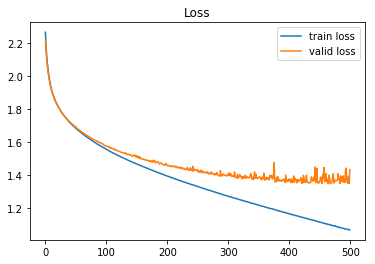

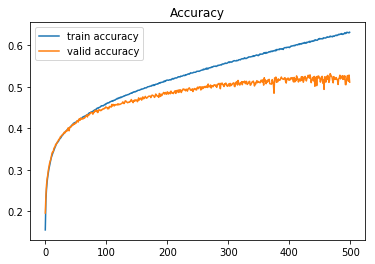

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()